<a href="https://colab.research.google.com/github/tugcegurbuz/Psychophysics/blob/master/Getting%20Aperture%20Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description:** Basic script for getting aperture images for experimental design

---

In [0]:
from google.colab import files
from io import BytesIO
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Upload the the images you want
uploaded = files.upload()

Saving arm4.png to arm4.png
Saving leg4.png to leg4.png


In [3]:
#Check whether the image is in  your directory
!ls

arm4.png  leg4.png  sample_data


In [0]:
#Open the image and convert to RGB

arm = Image.open('arm4.png').convert("RGB")
leg = Image.open('leg4.png').convert("RGB")

In [5]:
#Arm

#Create NP array of the arm
npImage_a=np.array(arm)

#See image size
h_a, w_a = arm.size

print(h_a, w_a)

#Leg

#Create NP array of the leg
npImage_l=np.array(leg)

#See image size
h_l, w_l = leg.size


print('\n\n', h_l, w_l)


960 540


 960 540


In [0]:
#Arm

# Create an alpha layer
alpha_a = Image.new('L', arm.size,0)
draw_a = ImageDraw.Draw(alpha_a)

#Cut the arm
draw_a.pieslice([30,165, 30+370, 165+370],0,360,fill=255)

#Cut the hand
draw_a.pieslice([460,165, 460+370, 165+370],0,360,fill=255)
np_alpha_h = np.array(alpha_a)

# Add alpha layer to image
npImage_a=np.dstack((npImage_a,np_alpha_h))

#Leg

# Create an alpha layer
alpha_l = Image.new('L', leg.size,0)
draw_l = ImageDraw.Draw(alpha_l)

#Cut the leg
draw_l.pieslice([30,165, 30+370, 165+370],0,360,fill=255)

#Cut the foot
draw_l.pieslice([460,165, 460+370, 165+370],0,360,fill=255)
np_alpha_l = np.array(alpha_l)

# Add alpha layer to image
npImage_l=np.dstack((npImage_l,np_alpha_l))

(-0.5, 959.5, 539.5, -0.5)

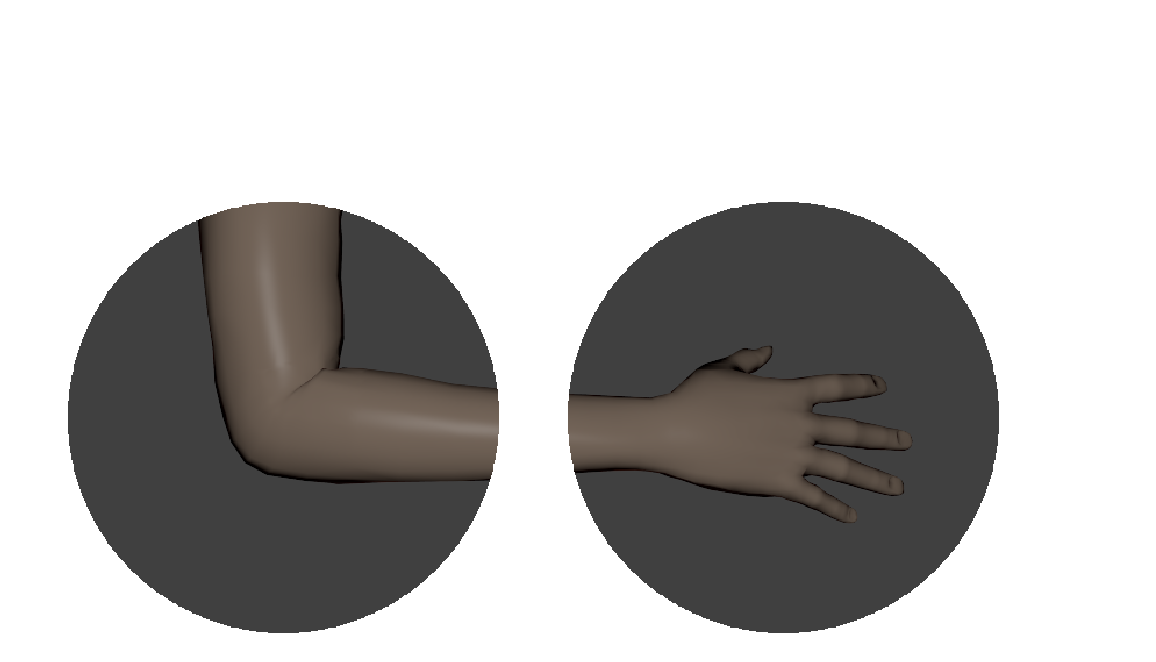

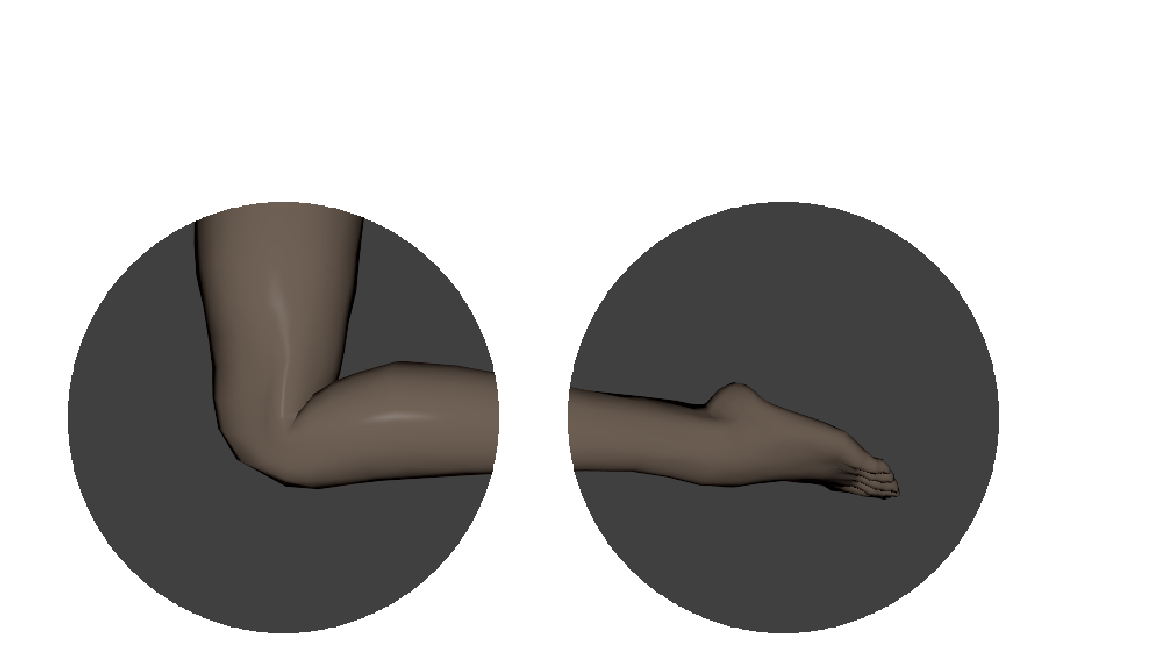

In [7]:
#Plot apertured arm
plt.figure(figsize=(20,20))
imgplot = plt.imshow(npImage_a)
plt.axis('off')

#Plot apertured leg
plt.figure(figsize=(20,20))
imgplot = plt.imshow(npImage_l)
plt.axis('off')